In [1]:
# Imports
import sys
sys.path.insert(0, '/home/carterrhea/Documents/LUCI/')  # Location of Luci
from LuciBase import Luci
import LUCI.LuciPlotting as lplt
import matplotlib.pyplot as plt

2022-09-07 09:37:52.409096: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-07 09:37:52.409118: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
#Set Parameters
# Using Machine Learning Algorithm for Initial Guess
Luci_path = '/home/carterrhea/Documents/LUCI/'
cube_dir = '/home/carterrhea/Documents/LUCI_test'  # Path to data cube
cube_name = 'NGC6946_SN3'  # don't add .hdf5 extension
object_name = 'NGC6946'
redshift = 0.000133
resolution = 1000 # The actual resolution is 400, but we don't have machine learning algorithms for that resolution, so we use 1000

In [3]:
# Create Luci object
cube = Luci(Luci_path, cube_dir+'/'+cube_name, cube_dir, object_name, redshift, resolution)

Reading in data...


100%|█████████████████████████████████████████████| 9/9 [00:04<00:00,  2.25it/s]


2022-09-07 09:38:00.508886: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-07 09:38:00.508920: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-07 09:38:00.508944: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pop-os): /proc/driver/nvidia/version does not exist
2022-09-07 09:38:00.509196: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
bkg_axis, bkg_sky = cube.extract_spectrum_region(cube_dir+'/bkg.reg', mean=True)  # We use mean=True to take the mean of the emission in the region instead of the sum

100%|█████████████████████████████████████| 2064/2064 [00:00<00:00, 2629.51it/s]


Optimization terminated successfully    (Exit mode 0)
            Current function value: 107.41169975340733
            Iterations: 3
            Function evaluations: 23
            Gradient evaluations: 3


<AxesSubplot:xlabel='Wavelength [cm-1]', ylabel='Flux [ergs s$^{-1}$ cm$^{-2}$ $\\AA^{-1}$]'>

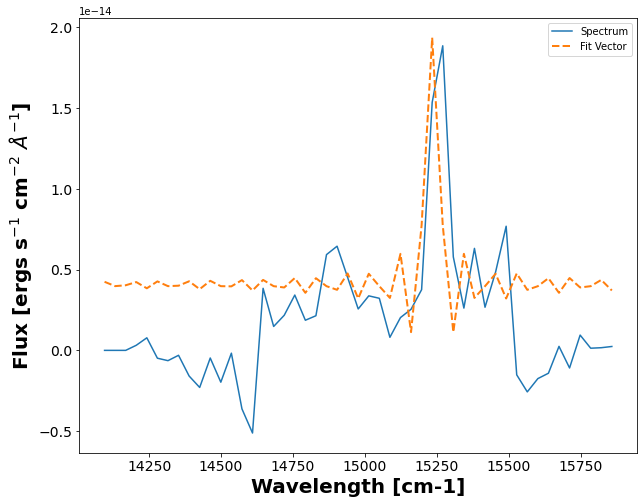

In [11]:
# Fit!
axis, sky, fit_dict = cube.fit_spectrum_region(
                                    #['NII6548', 'Halpha', 'NII6583'],#, 'SII6716', 'SII6731'],
                                    ['Halpha'],    
                                    'sinc',
                                    [1], [1],
                                    #[1,1,1], [1,1,1],
                                    #[1,1,1,1,1], [1,1,1,1,1],
                                    region=cube_dir+'/reg1.reg', bkg=bkg_sky)
lplt.plot_fit(axis, sky, fit_dict['fit_vector'])

Evidently the fit of the Halpha/[NII] doublet complexe isn't very good. This is purely due to the poor resolution of the cube (R~400). 

In [9]:
fit_dict

{'fit_sol': array([1.57116316e-14, 1.52442050e+04, 2.82005578e+00, 4.05215493e-15]),
 'fit_uncertainties': array([0., 0., 0., 0.]),
 'amplitudes': [1.5711631599125604e-14],
 'fluxes': [3.7194099930598214e-13],
 'flux_errors': [0.0],
 'chi2': 2.3999967256496456e-14,
 'velocities': [-133.85304260253176],
 'sigmas': [23.55131892410717],
 'vels_errors': [0.0],
 'sigmas_errors': [0.0],
 'axis_step': 46.167629656499976,
 'corr': 1.0598056937097515,
 'continuum': 4.052154933838958e-15,
 'scale': 1.916736066472079e-14,
 'vel_ml': -133.85304260253906,
 'vel_ml_sigma': 0,
 'broad_ml': 55.4591178894043,
 'broad_ml_sigma': 0,
 'fit_vector': array([4.2316601e-15, 3.9591125e-15, 4.0142348e-15, 4.2146665e-15,
        3.8232984e-15, 4.2573062e-15, 3.9580287e-15, 3.9867486e-15,
        4.2636411e-15, 3.7698311e-15, 4.2936477e-15, 3.9570944e-15,
        3.9453278e-15, 4.3381775e-15, 3.6870988e-15, 4.3508419e-15,
        3.9562309e-15, 3.8752075e-15, 4.4676694e-15, 3.5385024e-15,
        4.4574944e-15, 3